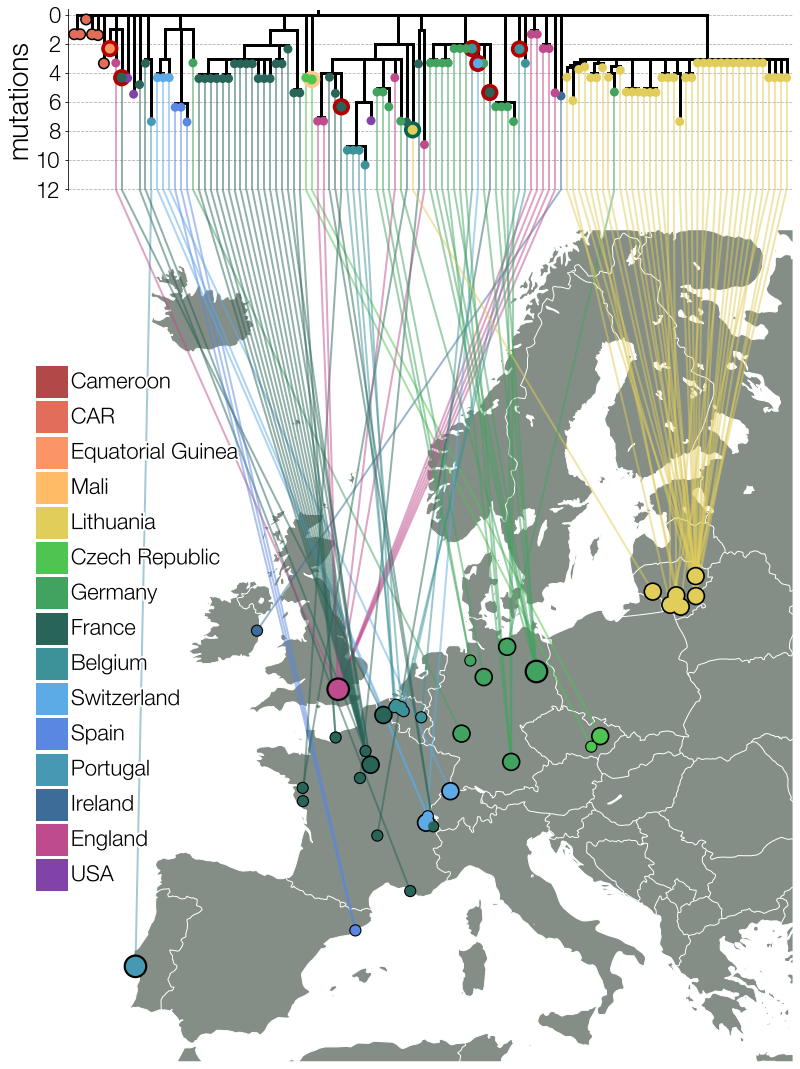

In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib.collections import LineCollection
from matplotlib.patches import Rectangle,Polygon
from matplotlib.gridspec import GridSpec

typeface='Helvetica Neue'
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22
mpl.rcParams['pdf.fonttype']=42

import os,glob
import numpy as np
from Bio import SeqIO
from collections import Counter

import baltic as bt

import cartopy
import cartopy.crs as ccrs

from matplotlib.patches import ConnectionPatch

# from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
# from matplotlib.figure import Figure

def desaturate(rgb,sat,lum=None):
    if isinstance(rgb,str):
        rgb=mpl.colors.hex2color(rgb) ## convert to rgb if string given
    elif np.array(rgb).shape[-1]==4: ## if there's four values
        rgb=rgb[:-1]
    elif isinstance(rgb,unicode):
        rgb=mpl.colors.hex2color(rgb) ## convert to rgb if string given

    assert 0.0<=sat<=1.0,'Desaturation outside allowed interval'
    assert np.array(rgb).shape[-1]==3,'Incorrect colour array shape'
    hsv=mpl.colors.rgb_to_hsv(rgb) ## convert rgb vector to hue, saturation, value
    hsv[1]=sat ## use provided saturation
    if lum:
        hsv[2]=lum ## use provided luminosity
    
    return mpl.colors.hsv_to_rgb(hsv) ## convert back to rgb


locs={}
loc_size={'town': 1, 'county': 2, 'country': 3}

coordinates={'Liège': (50.63373,5.56749,'town'), 
             'England': (51.509865,-0.118092,'country'), 
             'Rhineland-Palatinate': (49.992863,8.247253,'county'), 
             'Geneva': (46.204391,6.143158,'county'), 
             'Sint-Joost-ten-Node': (50.85,4.383333,'town'), 
             'Vilniaus_apskritis': (54.68916,25.2798,'county'), 
             'Lower_Saxony': (52.373920,9.735603,'county'), 
             'Bavaria': (48.777500,11.431111,'county'), 
             'La_Roche-sur-Yon': (46.670502,-1.426000,'town'), 
             'Issoire': (45.55,3.25,'town'), 
             'Alytus': (54.4000,24.0500,'county'),
             'Maryland': (39.045753,-76.641273,'country'), 
             'Pontoise': (49.051601,2.101700,'town'), 
             'Taurages': (55.25222, 22.28972,'county'), 
             'Utenos': (55.5,25.6,'county'), 
             'Kaunas': (54.90272,23.90961,'county'), 
             'Marijampole': (54.56667, 23.35,'county'), 
             'Utenos_apskritis': (55.5,25.6,'county'), 
             'Vilassar_De_Mar': (41.50408,2.39226,'town'), 
             'Utena': (55.5,25.6,'county'), 
             'Germany': (52.531677,13.381777,'country'), 
             'Vilnius': (54.68916,25.2798,'county'), 
             'Asse': (50.91011,4.19836,'town'), 
             'West_Virginia': (32.784618,-79.940918,'country'), 
             'Cluses': (46.060390,6.580582,'town'), 
             'CAR': (6.6194,20.9367,'country'), 
             'Hauts-de-France': (50.629250,3.057256,'county'), 
#              'Equatorial Guinea': (1.6195,10.3178,'country'), 
#              'Central African Republic': (16.346400, 3.436900,'town'), ## park coordinates
             'Olomouc_Region': (49.593778,17.250879,'county'), 
             'Le_Havre': (49.490002,0.100000,'town'), 
             'Lochristi': (51.097461,3.837824,'town'), 
             'Buggenhout': (51.0159,4.20173,'town'), 
             'Mali': (12.635898,-7.971547,'country'), 
             'Cameroon': (3.844119, 11.501346,'country'), 
             'Equatorial_Guinea': (3.75578,8.78166,'country'),
             'Neder-Over-Heembeek': (50.9057, 4.3922,'town'), 
             'France': (48.864716,2.349014,'country'), 
             'Vilassar De Dalt': (41.517, 2.367,'town'), 
             'Dublin': (53.350140,-6.266155,'town'), 
             'Ile-de-France': (48.5000,2.5000,'county'), 
             'Basel-Landschaft': (47.559601,7.588576,'county'), 
             'Marseille': (43.296398,5.370000,'town'), 
             'Brno': (49.19522,16.60796, 'town'), 
             'Portugal': (38.736946,-9.142685,'country'), 
             'Orleans': (47.90289,1.90389,'town'), 
             'Vaud': (46.478176,6.238849,'town'), 
             'Merelbeke': (50.994550,3.745640,'town'), 
             'Bremen': (53.07516,8.80777,'town'), 
             'Nantes': (47.218102,-1.552800,'town'), 
             'Mecklenburg-Western_Pomerania': (53.629593,11.414763,'county')}

travel={}
for line in open('/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/data/travel_qc_info.csv','r'):
    l=line.strip('\n').split('\t')
#     print(l[3])
    if l[0]!='Virus name':
        locs[l[0].replace(' ','_')]=[c.strip(' ').replace(' ','_') for c in l[3].split('/')][-1]
        if l[4]!='':
            travel[l[0]]=l[4]
#         print(locs[l[0]])
#         print(locs[l[0]][-1],len(locs[l[0]]),locs[l[0]][-1] in coordinates)

locs['hCoV-19/Belgium/Aalst-OLVZ-8042639/2021']='Asse'
locs['hCoV-19/Belgium/UGent-4359/2021']='Lochristi'
locs['hCoV-19/Belgium/UGent-4369/2021']='Buggenhout'

locs['hCoV-19/Belgium/UGent-4966/2021']='Merelbeke'
locs['hCoV-19/Belgium/UGent-5440/2021']='Merelbeke'


locs['hCoV-19/CAR/245/2021']='CAR'
locs['hCoV-19/CAR/242/2021']='CAR'
locs['hCoV-19/CAR/226/2021']='CAR'
locs['hCoV-19/CAR/229/2021']='CAR'
locs['hCoV-19/CAR/237/2021']='CAR'
locs['hCoV-19/CAR/234/2021']='CAR'
locs['hCoV-19/CAR/235/2021']='CAR'


fig = plt.subplots(figsize=(13,20),facecolor='w')

eu_proj=ccrs.EuroPP()
gs = GridSpec(2,1,hspace=0.01,wspace=0.0,height_ratios=[1,5])
ax=plt.subplot(gs[1],projection=eu_proj)


scale='50m'
# water='#CED6D9'
water='w'
land='#848E86'

ax.add_feature(cartopy.feature.LAKES.with_scale(scale),facecolor=water)
ax.add_feature(cartopy.feature.OCEAN.with_scale(scale),facecolor=water,edgecolor=water)
ax.add_feature(cartopy.feature.LAND.with_scale(scale),facecolor=land,edgecolor='w')
ax.add_feature(cartopy.feature.BORDERS.with_scale(scale),edgecolor='w',lw=1,zorder=2)
# ax.gridlines(color='k',linestyle='--',alpha=0.2)

W,E=-1400000.0, 2000000.0
S,N=4000000.0, 7900000.0

# ax.set_extent()
ax.set_extent([W,E,S,N],crs=eu_proj)


ax2=plt.subplot(gs[0])
# ax2.plot()


colours={}
for line in open('/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/colours.csv','r'):
    loc,colour=line.strip('\n').split('\t')
    colours[loc]=colour

alnL=0
seqs={}
for seq in SeqIO.parse('/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/data/alignments/B.1.620_wRef_woDRC.fasta','fasta'):
    alnL=len(seq.seq)
    seqs[seq.id]=str(seq.seq)

ll=bt.loadNewick('/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/data/trees/B.1.620_wRef_woDRC.newick')

# ll=bt.loadNexus('/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/data/trees/B.1.620_wRef_woDRC_renamed.tre',absoluteTime=False,treestring_regex='tree con_50_majrule =')

# rename={}
# for line in open('/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/data/trees/B.1.620_wRef_woDRC.fasta_names_keyfile.txt','r'):
#     key,val=line.strip('\n').split('@')
#     rename[key[1:]]=val[1:]
    
# for k in ll.getExternal():
#     k.name=rename[k.name]

ll=ll.collapseBranches(lambda k: k.length==0)

for k in ll.Objects:
    k.length=k.length*alnL

    
ll.sortBranches(descending=False)
sorted_children=sorted(ll.root.children,key=lambda w: w.length)
ll.root.children=sorted_children
ll.drawTree()
# ll.treeStats()

variable=[]

travel_cases=[s for s in seqs if s.split('|')[0] in travel]
ca=ll.commonAncestor(ll.getExternal(lambda k: k.name in travel_cases))
# ca=ll.commonAncestor(ll.getExternal(lambda k: 'B.1.620' in k.name)) ## get common ancestor of lineage
ll=ll.subtree(ca)
ll.root.length=0.3
ll.traverse_tree()

def get_mean_coordinate(k):
    coords=[]
    if k.is_node():
        for ch in k.leaves:
            if len(ch.split('|'))==4:
                loc=ch.split('|')[1]
            else:
                loc=ch.split('|')[0]
            loc=loc.replace(' ','_')
            lon,lat,s=coordinates[locs[loc]]
#             coords.append((lon,lat))
            coords.append(lon)
    else:
        if len(k.name.split('|'))==4:
            loc=k.name.split('|')[1]
        else:
            loc=k.name.split('|')[0]
        loc=loc.replace(' ','_')
        lon,lat,s=coordinates[locs[loc]]
#         coords.append((lon,lat))
        coords.append(lon)
#     print(coords)
    return np.mean(coords)

ll.root.children=sorted(ll.root.children,key=lambda w: -get_mean_coordinate(w))
ll.drawTree()


ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(2))

linewidths=[]
branches=[]
for k in ll.Objects: ## iterate over branches
    x=k.height ## get branch x position
    xp=k.parent.height if k.parent else k.height ## get parent x position
    y=k.y ## get y position
    yp=k.parent.y if k.parent else k.y
    
    x-=ll.root.length
    xp-=ll.root.length
    
    if k.is_node():
        yl,yr=k.children[0].y,k.children[-1].y
        branches.append(((yr,x),(yl,x)))
    
    linewidths.append(3)
    
    branches.append(((y,x),(y,xp)))
    

line_segments = LineCollection(branches,lw=linewidths,color='k',capstyle='projecting')
ax2.add_collection(line_segments)

ax2.plot()
ax2.invert_yaxis()


done=[]
for k in ll.getExternal():
#     strain=k.name.split('|')[1] if len(k.name.split('|'))>1 else ''
    strain=k.name.split('|')[0] if len(k.name.split('|'))>1 else ''
    if strain in locs:
#         print()
        lat,lon,size=coordinates[locs[strain]]
        
#         skip=0.5
        s=80
        
        country=strain.split('/')[1]
        fc=colours[country.replace('_',' ')]
        ec='k'
        scale=1.8
        if strain in travel:
#             ec='red'
            s=100
            scale=3
#             if 'Lithuania' in strain:
            ec=colours[travel[strain]]
        
        fc=desaturate(fc,0.6)
        ax2.scatter(k.y,k.height,s=s,facecolor=fc,edgecolor='none',zorder=10000)
        
        if strain in travel or country in ['CAR','Cameroon','Equatorial_Guinea']:
            ax2.scatter(k.y,k.height,s=s*scale,facecolor=ec,edgecolor='none',zorder=9999)
        
        if locs[strain] in ['Maryland','West_Virginia','CAR','Equatorial_Guinea']:
            pass
        else:
            latT,lonT=eu_proj.transform_point(lon, lat, ccrs.PlateCarree())
            
            c=fc
            al=0.5
            ax2.plot([k.y,k.y],[12,k.height],color=c,ls='-',lw=2,alpha=al)
            con = ConnectionPatch(xyA=(k.y,12), 
                                  coordsA=ax2.transData, 
                                  axesA=ax2,
                                  xyB=(latT,lonT), 
                                  coordsB=ax.transData,
                                  axesB=ax, 
                                  color=c, ls='-',lw=2,zorder=3,alpha=al)
            
            ax.add_patch(con)
#             fig[0].add_artist(con)
            
            s=loc_size[size]**1.2
            if (lon,lat) not in done:
                ax.scatter(lon,lat,s=100*s,facecolor=fc,edgecolor='none',
                           zorder=10000,transform=ccrs.PlateCarree(),clip_on=False)
                ax.scatter(lon,lat,s=150*s,facecolor='k',edgecolor='none',
                           zorder=9999,transform=ccrs.PlateCarree(),clip_on=False)
                done.append((lon,lat))
            

h=150000
w=150000

# W,E=-1400000.0, 2000000.0
# S,N=4000000.0, 7900000.0

for c,country in enumerate(['USA', 'England', 'Ireland', 'Portugal', 'Spain', 'Switzerland', 'Belgium', 'France', 'Germany', 'Czech Republic', 'Lithuania', 'Mali', 'Equatorial Guinea', 'CAR', 'Cameroon']):
    x=-1550000
    y=4800000+c*h*1.1
    fc=colours[country]
    fc=desaturate(fc,0.6)
    effects=[path_effects.Stroke(linewidth=4, foreground='white'),
             path_effects.Stroke(linewidth=0, foreground='k')] ## black text, white outline
    
    ax.add_patch(Rectangle((x,y),w,h,facecolor=fc,edgecolor='none',clip_on=False))
    ax.text(x+w*1.1,y+h/2,country,color='k',va='center',path_effects=effects)

[ax.spines[loc].set_visible(False) for loc in ax.spines]
[ax2.spines[loc].set_visible(False) for loc in ax2.spines if loc not in ['left']]

ax2.grid(axis='y',ls='--')

ax2.set_ylabel('mutations',size=28)
ax2.set_ylim(12.01,-0.4)
ax2.set_xlim(-0.6,ll.ySpan+0.6)

ax.set_yticks([])
ax.set_yticklabels([])
# ax2.set_yticks([])
# ax2.set_yticklabels([])
ax2.set_xticks([])
ax2.set_xticklabels([])

plt.savefig('/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/figures/Fig3_travelers.png',dpi=100,bbox_inches='tight')

plt.savefig('/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/FigX_travelers.pdf',dpi=300,bbox_inches='tight')
plt.show()